<a href="https://colab.research.google.com/github/rameshavinash94/CMPE258_Assignment4/blob/main/Keras_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

**LOADING CALIFORNIA HOUSING DATASET**

In [4]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

**CREATING MODEL**

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 1.9197 - val_loss: 3.8361
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.8247 - val_loss: 1.6986
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.8313
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6350 - val_loss: 0.6322
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5964 - val_loss: 0.5551
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - val_loss: 0.5281
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5420 - val_loss: 0.5205
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5221 - val_loss: 0.5021
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5047 - val_loss: 0.4928
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4902 - val_loss: 0.4855

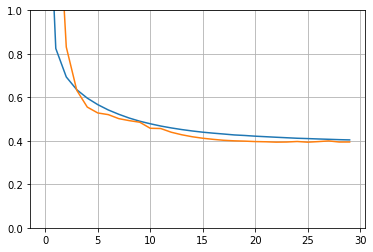

In [14]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()